# West Nile Project

<img src="west_nile/input/Capture5.PNG" height="400" width="400">

#### The deets
<img src="west_nile/input/Capture.PNG" height="600" width="600">

**C:/Users/datta/project4/project-4/data/west_nile/input/noaa_weather_qclcd_documentation.pdf**
** **
<b> Link: </b>
https://www.kaggle.com/c/predict-west-nile-virus/data

<span style="color:green">
    <p><b>Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT<p> Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level</p></p>
    <p></p>
    <p>Station 2: CHICAGO MIDWAY INTL ARPT<p> Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level</p></p></b>
    </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### LOAD DATA

In [2]:
west = pd.read_csv("west_nile/input/train.csv")
spray = pd.read_csv("west_nile/input/spray.csv")
weather = pd.read_csv("west_nile/input/weather.csv")

#### Check out the train file (named west here)

In [3]:
west = west.set_index(pd.DatetimeIndex(west['Date']))

In [23]:
west['2009']

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,,,,,
2009-05-28,2009-05-28,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2,0
2009-05-28,2009-05-28,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,1,0
2009-05-28,2009-05-28,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,1,0
2009-05-28,2009-05-28,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,1,0
2009-05-28,2009-05-28,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,2,0
2009-05-28,2009-05-28,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX RESTUANS,17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,3,0
2009-05-28,2009-05-28,"7500 North Oakley Avenue, Chicago, IL 60645, USA",CULEX PIPIENS/RESTUANS,75,N OAKLEY AVE,T148,"7500 N OAKLEY AVE, Chicago, IL",42.017430,-87.687769,8,2,0
2009-05-28,2009-05-28,"7500 North Oakley Avenue, Chicago, IL 60645, USA",CULEX RESTUANS,75,N OAKLEY AVE,T148,"7500 N OAKLEY AVE, Chicago, IL",42.017430,-87.687769,8,2,0
2009-05-28,2009-05-28,"8900 South Carpenter Street, Chicago, IL 60620...",CULEX PIPIENS/RESTUANS,89,S CARPENTER ST,T159,"8900 S CARPENTER ST, Chicago, IL",41.732984,-87.649642,8,2,0


In [5]:
#See a single day data to see where the West Nile Virus is present
west[(west["Date"] =="2013-09-26") & (west['WnvPresent'] == 1)]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,,,,,
2013-09-26,2013-09-26,"4600 Milwaukee Avenue, Chicago, IL 60630, USA",CULEX PIPIENS,46,N MILWAUKEE AVE,T003,"4600 N MILWAUKEE AVE, Chicago, IL",41.964242,-87.757639,8,3,1
2013-09-26,2013-09-26,"6300 West 64th Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,63,W 64TH ST,T155,"6300 W 64TH ST, Chicago, IL",41.776156,-87.778927,9,4,1
2013-09-26,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,39,1
2013-09-26,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1


**We only have data from every other year starting from 2007 until 2013**
** **
**Look below**

In [17]:
#Checking out WnvPresent instances and number of mosquitos for each year
west.resample('Y').sum()[["NumMosquitos","WnvPresent"]]
#plt.scatter(west["Date"], west["NumMosquitos"])

,NumMosquitos,WnvPresent
Date,,
2007-12-31,58688,236
2008-12-31,0,0
2009-12-31,21108,19
2010-12-31,0,0
2011-12-31,18799,57
2012-12-31,0,0
2013-12-31,36444,239


In [24]:
west_by_month = west.resample('M').sum()[["NumMosquitos","WnvPresent"]]
west_by_month[west_by_month["NumMosquitos"]>0]

,NumMosquitos,WnvPresent
Date,,
2007-05-31,40,0
2007-06-30,428,0
2007-07-31,7199,6
2007-08-31,40015,200
2007-09-30,9300,28
2007-10-31,1706,2
2009-05-31,190,0
2009-06-30,7390,0
2009-07-31,8833,5


In [ ]:
west_by

<BarContainer object of 8 artists>

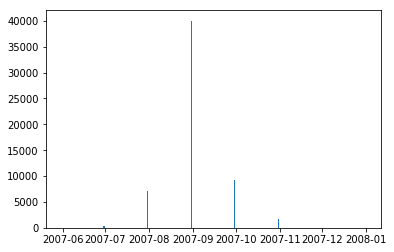

In [29]:
plt.bar(west_by_month['2007'].index, west_by_month['2007']["NumMosquitos"])

In [7]:
#See which mosquitos are common in the collected data
west["Species"].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [8]:
#Check out the percent rate of West Nile Virus occurence
grouped = west.groupby(["Species"])
grouped_percentage = pd.DataFrame()
grouped_percentage["Number of Total Instances"] = west["Species"].value_counts()
grouped_percentage["WnvNotPresent Rate"] = grouped["WnvPresent"].apply(lambda x : x.value_counts()[0]/len(x) )
grouped_percentage["WnvPresent Rate"] = 1 - grouped_percentage["WnvNotPresent Rate"]
grouped_percentage["WnvNotPresent Instances"] = grouped_percentage["Number of Total Instances"] * grouped_percentage["WnvNotPresent Rate"]
grouped_percentage["WnvPresent Instances"] = grouped_percentage["Number of Total Instances"] - grouped_percentage["WnvNotPresent Instances"]

grouped_percentage

,Number of Total Instances,WnvNotPresent Rate,WnvPresent Rate,WnvNotPresent Instances,WnvPresent Instances
CULEX PIPIENS/RESTUANS,4752,0.944865,0.055135,4490.0,262.0
CULEX RESTUANS,2740,0.982117,0.017883,2691.0,49.0
CULEX PIPIENS,2699,0.911078,0.088922,2459.0,240.0
CULEX TERRITANS,222,1.000000,0.000000,222.0,0.0
CULEX SALINARIUS,86,1.000000,0.000000,86.0,0.0
CULEX TARSALIS,6,1.000000,0.000000,6.0,0.0
CULEX ERRATICUS,1,1.000000,0.000000,1.0,0.0


<BarContainer object of 7 artists>

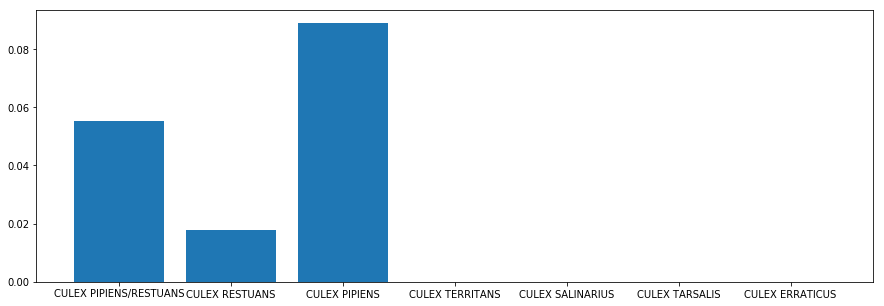

In [13]:
plt.figure(figsize=(15,5))
plt.bar(grouped_percentage.index,grouped_percentage["WnvPresent Rate"])

**It seems only the CULEX PIPIENS and CULEX RESTUANS can carry the virus**


**Further research confirms this, even though CULEX TARSALIS also carries the virus there are no instances of them having the virus, only six data points on them have been collected which may be a reason why**
<img src="west_nile/input/Capture3.PNG" height="700" width="700">

In [ ]:
spray = spray.set_index(pd.DatetimeIndex(spray['Date']))
spray.drop(labels = "Time",axis = 1,inplace = True)

In [ ]:
spray["Latitude"].min(),spray["Latitude"].max()

In [ ]:
spray["Longitude"].min(),spray["Longitude"].max()

In [ ]:
spray.Date.value_counts().sort_index()

##### Looked into the days in spray dataset 

<table align = "left">
    <tr><td>2011-08-29  Monday</td></tr>
    <tr><td>2011-09-07  Wednesday</td></tr>
    <tr><td>2013-07-17  Wednesday</td> </tr>
    <tr><td>2013-07-25  Thursday</td></tr>
    <tr><td>2013-08-08  Thursday</td></tr>
    <tr><td>2013-08-15  Thursday</td></tr>
    <tr><td>2013-08-16  Friday</td></tr>
    <tr><td>2013-08-22  Thursday</td></tr>
    <tr><td>2013-08-29  Thursday</td></tr>
    <tr><td>2013-09-05  Thursday</td></tr>
</table>    

## Link to random article about spraying in chicago:
https://www.cityofchicago.org/city/en/depts/cdph/provdrs/healthy_communities/news/2018/july/city-to-spray-insecticide-wednesday-to-kill-mosquitoes.html

In [26]:
weather = weather.set_index(pd.DatetimeIndex(weather['Date']))
weather1 = weather.copy()
weather1.replace('M', 0.0, inplace = True)
weather1.replace('  T', 0.0, inplace = True)

In [27]:
weather1

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,0.0,0.0,0.00,29.10,29.82,1.7,27,9.2
2007-05-01,2,2007-05-01,84,52,68,0,51,57,0,3,...,,0,0.0,0,0.00,29.18,29.82,2.7,25,9.6
2007-05-02,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,0.0,0.0,0.00,29.38,30.09,13.0,4,13.4
2007-05-02,2,2007-05-02,60,43,52,0,42,47,13,0,...,BR HZ,0,0.0,0,0.00,29.44,30.08,13.3,2,13.4
2007-05-03,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,0.0,0.0,0.00,29.39,30.12,11.7,7,11.9
2007-05-03,2,2007-05-03,67,48,58,0,40,50,7,0,...,HZ,0,0.0,0,0.00,29.46,30.12,12.9,6,13.2
2007-05-04,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,0.0,0.0,0,29.31,30.05,10.4,8,10.8
2007-05-04,2,2007-05-04,78,51,0,0,42,50,0,0,...,,0,0.0,0,0.00,29.36,30.04,10.1,7,10.4
2007-05-05,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,0.0,0.0,0,29.40,30.10,11.7,7,12.0


In [ ]:
west_nile = pd.concat([west,weather])

In [ ]:
west_nile

In [ ]:
weather2 = weather.copy()

In [ ]:
weather2[["Sunrise","Sunset"]]

In [25]:
weather2

NameError: name 'weather2' is not defined